In [1]:
import sys
import os

sys.path.append(os.path.join(
    r'C:\Users\AA2-ControlPC\Software\NI-experiment-control\nistreamer'
))

In [2]:
from nistreamer import NIStreamer
from nistreamer.utils import iplot, RendOption
import numpy as np

### Instantiate streamer and add cards

In [3]:
ni_streamer = NIStreamer()

In [4]:
ao_card = ni_streamer.add_ao_card(
    max_name='PXI1Slot3',
    samp_rate=1e6
)

ao_card.cfg_start_trig(
    line='PXI_Trig0',
    export=True
)
ao_card.cfg_ref_clk(
    line='PXI_Trig7',
    export=True
)

In [5]:
do_card = ni_streamer.add_do_card(
    max_name='PXI1Slot6',
    samp_rate=10e6
)

do_card.cfg_start_trig(
    line='PXI_Trig0'
)
do_card.cfg_samp_clk_src(
    src='PXI_Trig7'
)

In [6]:
ao_card

AO card PXI1Slot3
	Sample clock: Using 1,000,000.0 Hz onboard sample clock
	Start trigger: Exported start trigger to PXI_Trig0
	Reference clock: Exported 10.00 MHz reference to PXI_Trig7

### Add channels

In [7]:
my_ao = ao_card.add_chan(
    chan_idx=0,
    nickname='my_ao'
)

In [8]:
my_do = do_card.add_chan(
    port_idx=0,
    line_idx=0,
    nickname='my_do'
)

In [9]:
my_ao

Channel ao0 on card PXI1Slot3

### Add instructions

In [9]:
ni_streamer.clear_edit_cache()

In [10]:
my_ao.constant(
    t=0,
    dur=1e-3,
    val=0.5
)

my_do.go_high(t=0.5e-3)

my_ao.sine(
    t=1.0e-3,
    dur=1e-3,
    freq=1e3,
    amp=1.0,
    dc_offs=1.0
)

my_do.go_low(t=2.5e-3)

In [11]:
iplot(
    chan_list=[my_do, my_ao],
    nsamps=1000,
    renderer=RendOption.browser
)

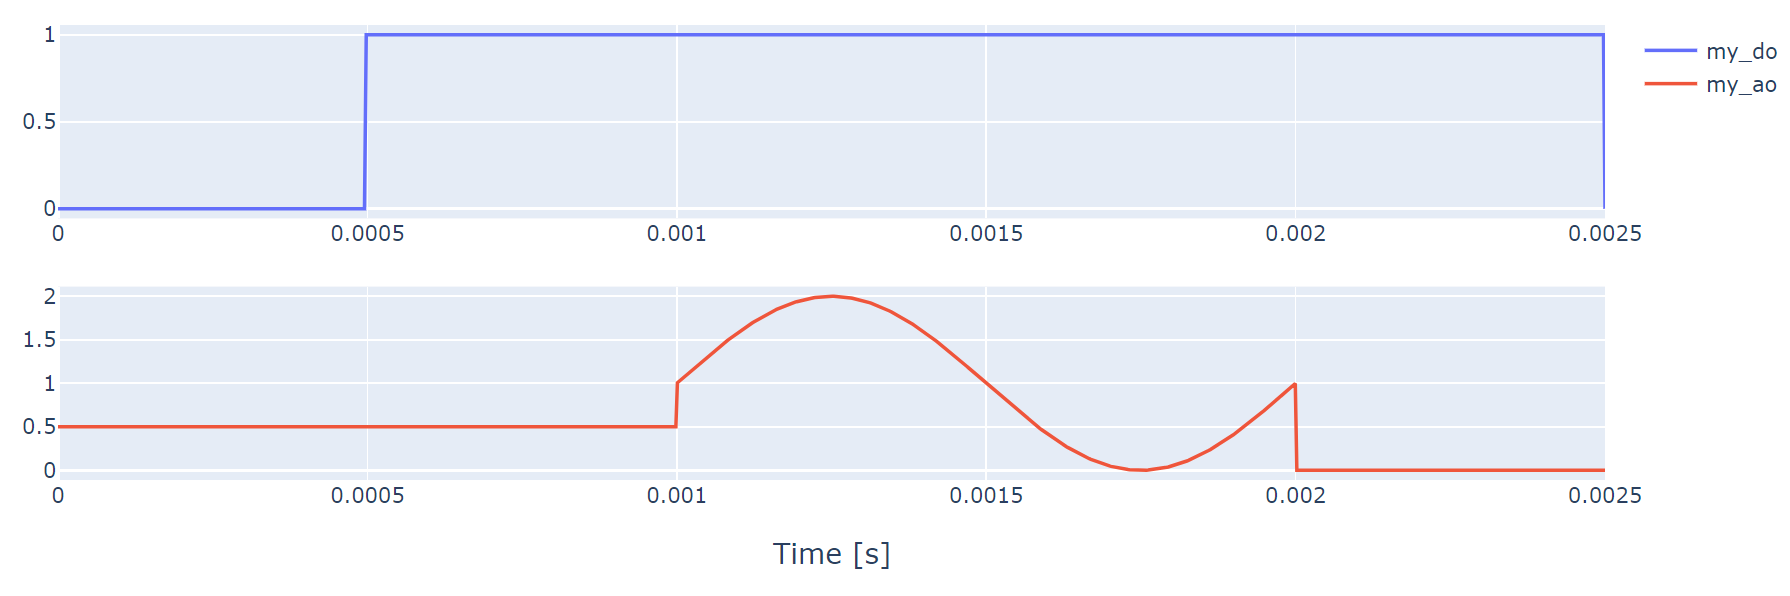

### Compile and stream

In [12]:
ni_streamer.compile()

0.0025001

In [16]:
ni_streamer.stream_exp()

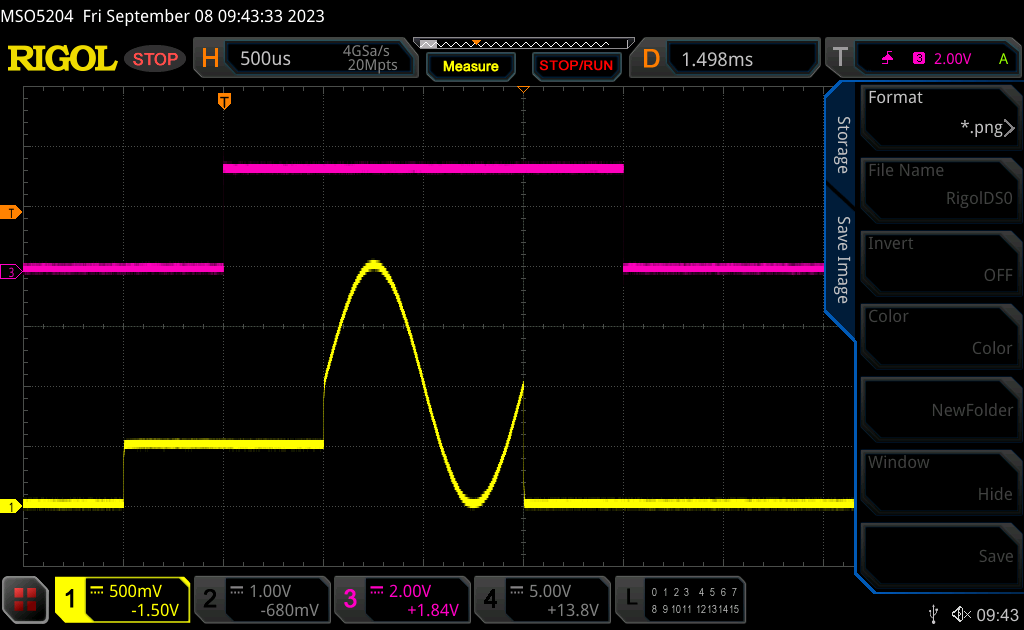

In [17]:
ni_streamer.reset_all()